In [2]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
mv /path/to/kaggle.json /root/.kaggle/kaggle.json

mv: cannot stat '/path/to/kaggle.json': No such file or directory


In [4]:
%env KAGGLE_USERNAME=yogeshrbagul
%env KAGGLE_KEY=39df83cbf75cb1ead6a35498fab6fb93

env: KAGGLE_USERNAME=yogeshrbagul
env: KAGGLE_KEY=39df83cbf75cb1ead6a35498fab6fb93


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [01:10<00:00, 18.9MB/s]
100% 1.06G/1.06G [01:10<00:00, 16.1MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 103ms/step - loss: 1.1964 - accuracy: 0.6064 - val_loss: 0.6421 - val_accuracy: 0.6328
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5773 - accuracy: 0.7059 - val_loss: 0.5231 - val_accuracy: 0.7390
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4802 - accuracy: 0.7697 - val_loss: 0.4555 - val_accuracy: 0.7848
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4385 - accuracy: 0.7963 - val_loss: 0.5618 - val_accuracy: 0.7208
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3724 - accuracy: 0.8361 - val_loss: 0.4423 - val_accuracy: 0.8034
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2989 - accuracy: 0.8719 - val_loss: 0.5438 - val_accuracy: 0.7820
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2190 - accuracy: 0.9090 - val_loss: 0.6885 - val_ac

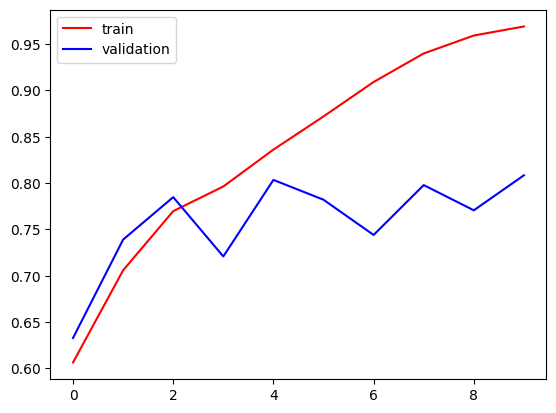

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

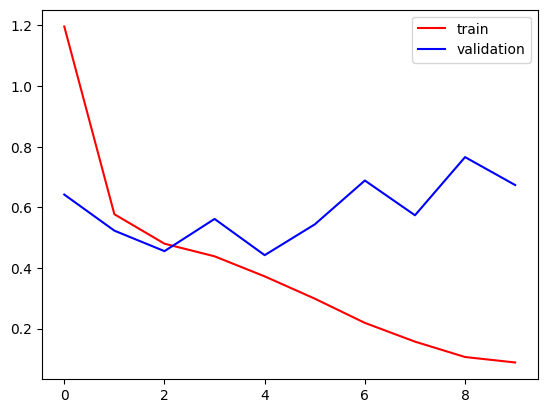

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [24]:
test_img = cv2.imread('/content/train/dogs/dog.10005.jpg')

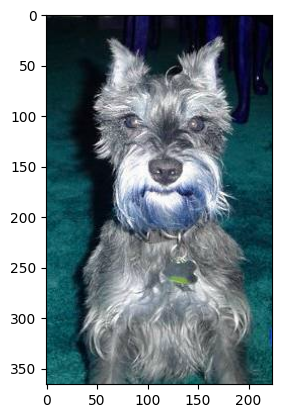

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(366, 224, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 267ms/step


array([[0.]], dtype=float32)